# Câu hỏi: Tổ hợp thể loại nào phổ biến và được đánh giá như thế nào? Thuộc tính thể loại có ảnh hưởng đến điểm đánh giá hay không?
- Lợi ích:
    1. Hiểu rõ thị hiếu của người xem
    2. Các nhà sản xuất có thể tập trung vào các tổ hợp thể loại phổ biến và được đánh giá cao để tối ưu hóa nội dung.
    3. Xác định những tổ hợp mang lại giá trị cao hơn về mặt nội dung hoặc có khả năng tạo ra điểm đánh giá tốt.
    4. Phân tích xu hướng của các thể loại
- Các bước thực hiện:
    1. Loại bỏ thể loại không mang lại giá trị phân tích như UNKNOWN
    2. Nhóm dữ liệu theo Genres
    3. Thực hiện phân tích:
        - Phân tích biểu đồ top 5 thể loại có số lượng nhiều nhất.
        - Phân tích biểu đồ số lượng của top 5 thể loại trên trong vòng 20 năm trở lại đây. 
        - Phân tích biểu đồ đường điểm trung bình của top 5 phim trên theo thời gian trong vòng 20 năm trở lại đây.
        - Phân tích các kiểm định thống kê.

# Đọc dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
df = pd.read_csv('../data/anime_preprocessing.csv')

In [3]:
df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Popularity,Year
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24.0,8.75,988000.0,43,1998
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,631,2001
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24.0,8.22,380049.0,258,1998
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25.0,7.24,44600.0,1908,2002
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23.0,6.93,6891.0,5485,2004


# Tiền xử lý

In [4]:
print("Missing values:")
print(df[['Score']].isnull().sum())

Missing values:
Score    0
dtype: int64


In [5]:
df = df[~df['Genres'].str.contains('UNKNOWN', na=False)]

In [6]:
print(len(df['Genres']))

8921


# Phân tích

## Các tổ hợp thể loại phổ biến được sản xuất nhiều

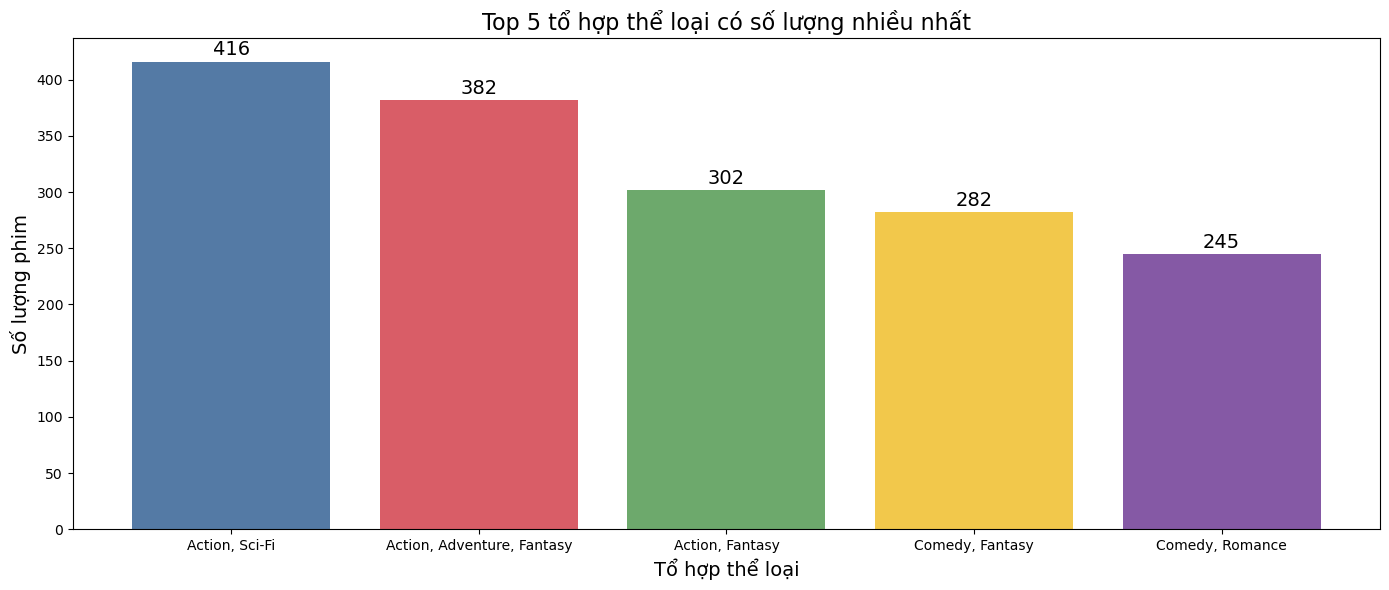

In [7]:
# Đếm số lượng phim theo tổ hợp thể loại trong cột 'Genres'
genre_combinations = df['Genres'].value_counts().sort_values(ascending=False)

# Lấy top 5 tổ hợp thể loại
top_5_combinations = genre_combinations.head(5)

colors = ['#547AA5', '#D95D67', '#6DA96C', '#F2C84B', '#8559A5']

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
bars = plt.bar(top_5_combinations.index, top_5_combinations.values, color=colors)

# Thêm số lượng trên đầu mỗi cột
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        int(bar.get_height()),
        ha='center', va='bottom', fontsize=14
    )

# Cấu hình biểu đồ
plt.title('Top 5 tổ hợp thể loại có số lượng nhiều nhất', fontsize=16)
plt.xlabel('Tổ hợp thể loại', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(ha='center')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



- Tổ hợp thể loại có số lượng nhiều nhất là Action, Sci-Fi với 416 bộ phim. Đây là tổ hợp thể loại được sản xuất nhiều nhất. Lý do có thể là do hai thể loại này được khán giả ưa chuộng với những cảnh hành động mãn nhãn kết hợp với các yếu tố khoa học viễn tưởng thú vị. Action, Adventure, Fantasy đứng thứ hai với 382 bộ phim và Action, Fantasy đứng thứ ba với 302 bộ phim. Vẫn là xu hướng hành động kết hợp các yếu tố thú vị như phiêu lưu và giả tưởng. Tiếp theo đó là Comedy, Fantasy và Comedy, Romance với số lượng lần lượt là 282, 245 mang đậm tính hài hước cho thấy khán giả vẫn yêu thích các thể loại nhẹ nhàng, lãng mạn và giải trí. Hai tổ hợp này có số lượng ít hơn so với các thể loại hành động, nhưng vẫn giữ được sự hiện diện mạnh mẽ.

- Các tổ hợp trong top 5 không quá chênh lệch nhau nhau từ 245 đến 416 bộ phim. Ta có thể suy ra rằng các tổ hợp thể loại trên được sản xuất một số lượng đáng kể hướng đến những tệp khán giả khác nhau.

- Các thể loại xuất hiện phổ biến nhất bao gồm hành động (Action), khoa học viễn tưởng (Sci-Fi), và giả tưởng (Fantasy). Điều này cho thấy các nhà sản xuất thường tập trung vào các nội dung có yếu tố bất ngờ, sáng tạo và kích thích trí tưởng tượng.

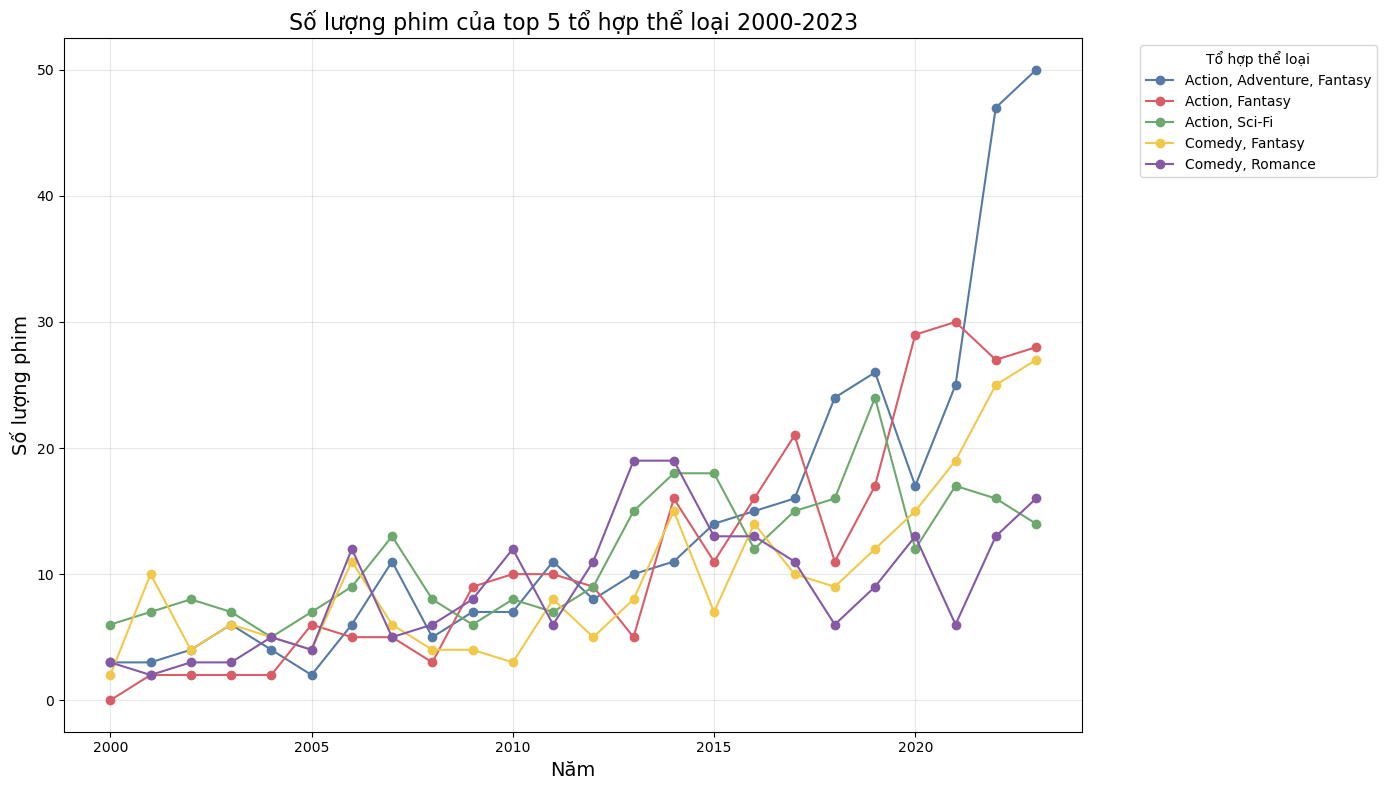

In [8]:
# Lọc dữ liệu trong vòng 20 năm trở lại đây, không tính năm hiện tại
current_year = pd.Timestamp.now().year
df_recent_20_years = df[(df['Year'] >= (current_year - 24)) & (df['Year'] < current_year)]

# Lọc dữ liệu cho top 10 tổ hợp thể loại
top_5_genres = top_5_combinations.index  # Lấy danh sách top 10 thể loại từ top_10_combinations
df_top_5_recent = df_recent_20_years[df_recent_20_years['Genres'].isin(top_5_genres)]

# Tính số lượng phim theo năm và thể loại
genre_counts_by_year = df_top_5_recent.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

# Vẽ biểu đồ đường
i = 0
plt.figure(figsize=(14, 8))
for genre in genre_counts_by_year.columns:
    plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], label=genre, marker='o', color = colors[i])                  
    i += 1

# Cấu hình biểu đồ
plt.title('Số lượng phim của top 5 tổ hợp thể loại 2000-2023', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.legend(title='Tổ hợp thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


- Biểu đồ thể hiện xu hướng tăng trưởng rõ rệt. Hầu hết các tổ hợp thể loại đều có xu hướng tăng trưởng đặc biệt nhất là tổ hợp Action, Adventure, Fantasy có sự gia tăng đột phá từ năm 2020 trở đi, vượt trội hơn hẳn so với các tổ hợp khác đạt mức 50 bộ phim vào năm 2023 cho thấy sự chuyển hướng mạnh mẽ của các nhà sản xuất anime sang các thể loại kết hợp phiêu lưu, giả tưởng và hành động.
- Phân tích từng thể loại:
    - Action, Adventure, Fantasy có đà tăng trưởng liên tục từ những năm 2000. Có sự suy giảm từ năm 2019 - 2022 nhưng đã trở lại đột phá trong các năm 2020 - 2023, đặc biệt 2021 - 2022 tăng từ 25 phim lên 48 phim, tăng trưởng gần gấp đôi và đạt 50 phim vào năm 2023. Đây là một sự phát triển vô cùng ấn tượng của thể loại này.

    - Từ con số 0 vào năm 2000, thể loại Action, Fantasy tăng trưởng liên tục và đạt 28 phim vào năm 2023. Tuy nhiên, thể loại này trải qua sự suy giảm số lượng đáng kể trong giai đoạn 2017-2018 trước khi quay lại đà tăng trưởng từ 2018 đến 2020 và bão hòa trong giai đoạn 2020-2023.

    - Dẫn đầu vào những năm đầu thập kỷ 2000 và giữ vị trí cao qua nhiều năm như 2002, 2003, 2005,... với đỉnh cao 24 phim vào năm 2019. Tuy nhiên, từ 2020 trở đi, thể loại này bước vào giai đoạn bão hòa và có dấu hiệu suy giảm so với các tổ hợp khác. Điều này có thể phản ánh những khó khăn trong việc lên các ý tưởng kết hợp yếu tố khoa học viễn tưởng bởi nó không chỉ yêu cầu sự sáng tạo đơn thuần mà phải dựa trên nền tảng khoa học.

    - Comedy, Fantasy tăng trưởng ổn định và có sự đột phá sau năm 2017 cho thấy xu hướng khán giả ngày càng yêu thích các bộ phim hài hước kết hợp yếu tố giả tưởng.

    - Comedy, Romance ổn định qua các năm 2010-2023, không có sự bùng nổ lớn về số lượng nhưng vẫn duy trì được sự hiện diện đều đặn hướng đến nhóm khán giả yêu thích sự nhẹ nhàng và lãng mạn.

- Biểu đồ đã thể hiện rõ xu hướng tăng trưởng của các tổ hợp thể loại phim qua thời gian, đặc biệt là sự bùng nổ của các thể loại kết hợp hành động, phiêu lưu và giả tưởng trong những năm gần đây. Mặc dù, thể loại hài kịch không bùng nổ về số lượng, các thể loại hài hước và lãng mạn vẫn giữ vị trí quan trọng hướng đến những khán giả yêu thích sự nhẹ nhàng và giải trí. Thị trường phim đang ngày càng đáp ứng thị hiếu của khán giả yêu thích sự sáng tạo và giải trí đa dạng.

## Chất lượng hay điểm đánh giá của các tổ hợp thể loại trên

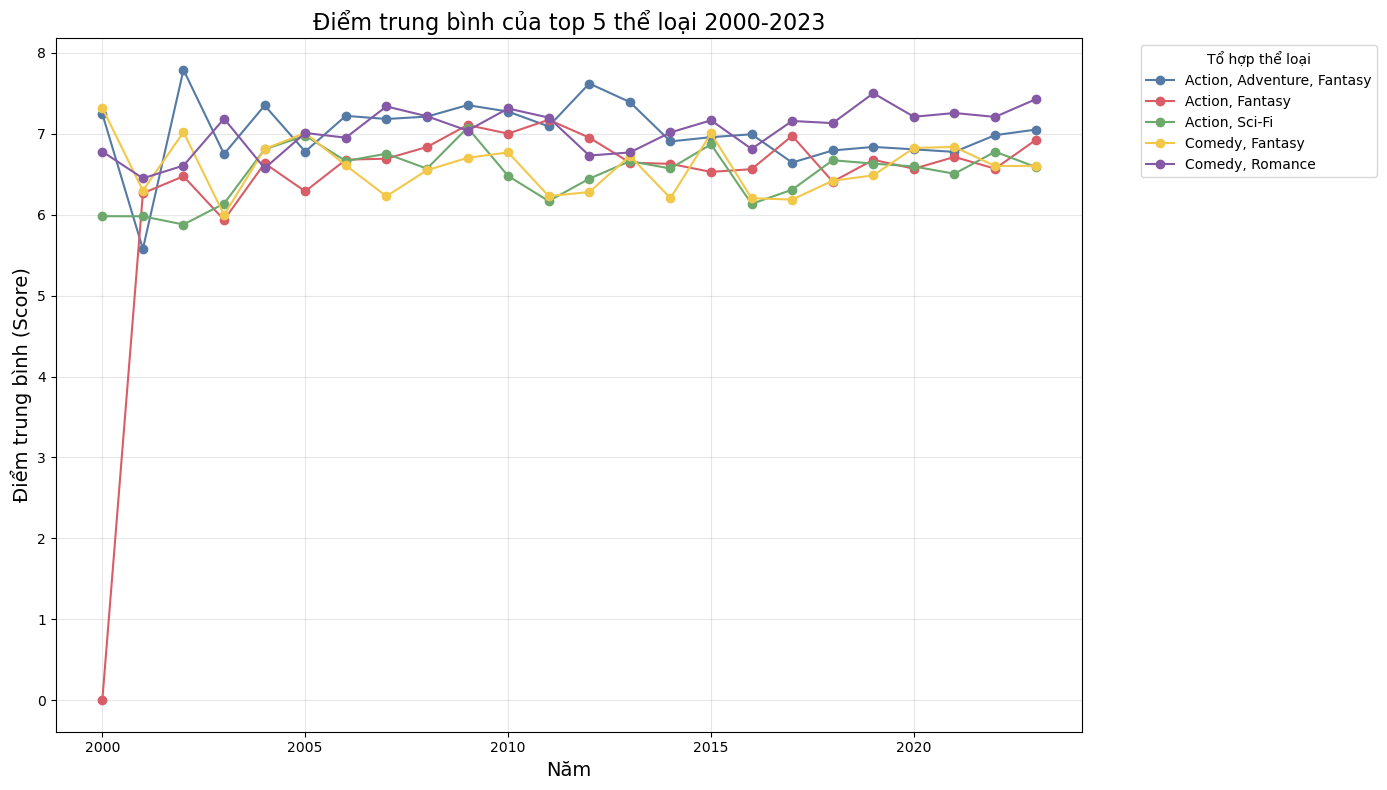

In [9]:
# Tính điểm trung bình theo năm và thể loại
avg_scores_by_year = df_top_5_recent.groupby(['Year', 'Genres'])['Score'].mean().unstack(fill_value=0)

# Vẽ biểu đồ đường
i = 0
plt.figure(figsize=(14, 8))
for genre in avg_scores_by_year.columns:
    plt.plot(avg_scores_by_year.index, avg_scores_by_year[genre], label=genre, marker='o', color = colors[i])
    i += 1

# Cấu hình biểu đồ
plt.title('Điểm trung bình của top 5 thể loại 2000-2023', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Điểm trung bình (Score)', fontsize=14)
plt.legend(title='Tổ hợp thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


- Điểm trung bình ổn định: Hầu hết các tổ hợp thể loại có điểm trung bình dao động trong khoảng từ 6.5 đến 7.5 trong phần lớn thời gian. Điều này cho thấy các tổ hợp này duy trì được chất lượng ổn định, phù hợp với thị hiếu khán giả qua các năm.
- Điểm bất thường vào năm 2000: Tổ hợp Comedy, Fantasy có một điểm bất thường rõ rệt với điểm trung bình rất thấp (0). Điều này là do vào thời điểm đó chưa có phim có thể loại này.
- Từ năm 2005 - 2017, cả 5 tổ hợp có sự đồng đều hơn về điểm trung bình. Không có tổ hợp nào vượt trội hoàn toàn về điểm trung bình so với phần còn lại. Từ sau 2017, tổ hợp Comedy, Romance có điểm trung bình nhinh hơn so với 4 tổ hợp còn lại. Đây có thể là do thị hiếu của khán giả thay đổi từ các phim hành động kịch tính sang các phim nhẹ nhàng tình cảm.
- Điểm trung bình duy trì ổn định trong hơn 20 năm qua cho thấy các tổ hợp này được sản xuất với chất lượng đáng tin cậy và phù hợp với kỳ vọng của khán giả. Các nhà sản xuất có thể cần cân nhắc đầu tư vào những tổ hợp có điểm cao và xu hướng tăng trưởng gần đây để duy trì sự quan tâm của người xem.

## Kiểm tra xem thuộc tính thể loại có ảnh hưởng đến điểm số không?

### ANOVA

In [10]:
from scipy.stats import f_oneway

df['Genres'] = df['Genres'].str.split(', ')

# Tạo một DataFrame mới với mỗi thể loại trên từng dòng
df_exploded = df.explode('Genres') 

# Tách điểm số theo từng thể loại
genres = df_exploded['Genres'].unique()
genre_scores = [df_exploded[df_exploded['Genres'] == genre]['Score'] for genre in genres]

# Kiểm định ANOVA
stat, p_value = f_oneway(*genre_scores)
print(f"F-statistic: {stat}, p-value: {p_value}")

F-statistic: 65.32706415381827, p-value: 1.551621059704599e-257


- F-statistic = 65.31: giá trị F là tỷ số giữa độ phân tán giữa các nhóm (between-group variance) và độ phân tán trong từng nhóm (within-group variance). Giá trị F lớn hơn 1 cho thấy biến động giữa các nhóm lớn hơn biến động trong từng nhóm hay điểm trung bình của các thể loại có khác biệt đáng kể. F-statistic khá lớn cho thấy các nhóm có điểm trung bình khác biệt cao.

- p-value = 1.7e-257: p-value rất nhỏ cho thấy có sự khác biệt có ý nghĩa thống kê giữa điểm trung bình của các thể loại và ta có thể kết luận rằng thuộc tính thể loại có ảnh hưởng đến điểm đánh giá.

### Eta Squared

In [11]:
# Tính trung bình tổng thể
overall_mean = df_exploded['Score'].mean()

# Tính SS_total
ss_total = np.sum((df_exploded['Score'] - overall_mean) ** 2)

# Tính SS_between
ss_between = 0
for genre in genres:
    group = df_exploded[df_exploded['Genres'] == genre]['Score']
    group_mean = group.mean()
    ss_between += len(group) * (group_mean - overall_mean) ** 2

# Tính Eta Squared
eta_squared = ss_between / ss_total
print(f"Eta Squared: {eta_squared}")


Eta Squared: 0.05073840074713464


Eta Squared = 0.0506 nằm trong khoảng [0.01, 0.06) cho thấy thể loại có ảnh hưởng nhỏ đến điểm đánh giá. Ta có thể kết luận được rằng dù có tác động đến điểm số nhưng thể loại không phải là yếu tố quyết định. Ta cần xem xét đến các thuộc tính khác.

### Kết luận chung

1. Số lượng sản xuất và xu hướng phát triển:
   - Thể loại phổ biến nhất: Tổ hợp "Action, Sci-Fi" dẫn đầu với 416 bộ phim, tiếp theo là "Action, Adventure, Fantasy" (382 bộ phim) và "Action, Fantasy" (302 bộ phim). Các thể loại này được ưa chuộng nhờ sự kết hợp giữa hành động mãn nhãn, yếu tố phiêu lưu và viễn tưởng sáng tạo, phù hợp với thị hiếu khán giả. Các tổ hợp thể loại phổ biến còn lại là "Comedy, Fantasy" và "Comedy, Romance" nghiêng về hướng hài hước.
   - Xu hướng tăng trưởng: Phần lớn các tổ hợp thể loại đều cho thấy sự gia tăng ổn định về số lượng phim. Đặc biệt, tổ hợp "Action, Adventure, Fantasy" đã có sự bùng nổ sau năm 2020, đạt 50 phim vào năm 2023. Trong khi đó, thể loại "Comedy, Fantasy" và "Comedy, Romance" giữ mức tăng trưởng ổn định, tập trung vào khán giả yêu thích sự nhẹ nhàng và lãng mạn.

2. Chất lượng tổ hợp thể loại theo thời gian:
   - Điểm trung bình của các tổ hợp thể loại ổn định trong khoảng từ 6.5 đến 7.5 trong hơn 20 năm qua, cho thấy các thể loại này duy trì chất lượng phù hợp với kỳ vọng của khán giả.
   - Sau năm 2017, tổ hợp "Comedy, Romance" có điểm trung bình nhỉnh hơn so với các tổ hợp còn lại, phản ánh sự chuyển hướng trong thị hiếu khán giả từ hành động sang các thể loại nhẹ nhàng, tình cảm.

3. Tác động của thể loại đến điểm số:

   - F-statistic = 65.31 với p-value = 1.7e-257: Có sự khác biệt có ý nghĩa thống kê giữa điểm trung bình của các thể loại, cho thấy thuộc tính thể loại có ảnh hưởng đến điểm đánh giá.
   - Eta Squared = 0.0506: Ảnh hưởng của thể loại đến điểm đánh giá là nhỏ, chứng tỏ rằng thể loại không phải yếu tố quyết định chính. Các nhà sản xuất cần cân nhắc thêm các yếu tố khác như studio sản xuất, thời lượng, hoặc nguồn nội dung.


4. Đề xuất
   - Đầu tư vào các tổ hợp tiềm năng: Các thể loại như "Action, Adventure, Fantasy" và "Comedy, Romance" có xu hướng tăng trưởng tốt và duy trì chất lượng ổn định, xứng đáng được đầu tư thêm.
   - Với ảnh hưởng nhỏ của thể loại đến điểm số, các nhà sản xuất nên tập trung thêm vào chất lượng sản xuất, cốt truyện, và phong cách nghệ thuật để tạo ra các bộ phim thành công.
